In this notebook, 

- we will read an image as numpy array
- create a vector database
- conver image as vector and store in the vector database
- and read it again from vector database

In [1]:
from matplotlib.image import imread
from matplotlib import pyplot as plt
import numpy as np
img = imread('cute_panda.jpg')
print(type(img))

<class 'numpy.ndarray'>


In [2]:
img.dtype

dtype('uint8')

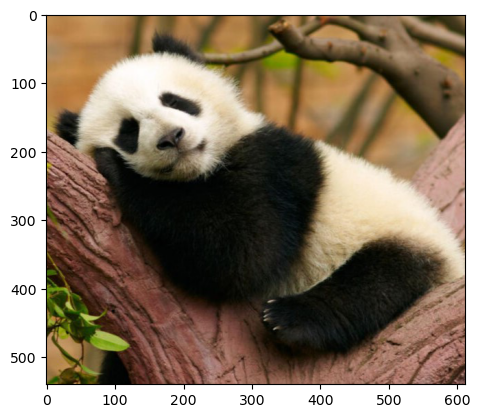

In [3]:
plt.imshow(img)

### Create a vector database

- create a vector table in the database
- convert numpy array(image) in to bytes 
- store in the image_vector table

In [4]:
import sqlite3
conn = sqlite3.connect('image_db.db')
cursor = conn.cursor()

cursor.execute("""
    CREATE TABLE IF NOT EXISTS image_vector(
    id INTEGER,
    image BLOB NOT NULL)
""")

cursor.execute("INSERT INTO image_vector(image) VALUES(?)",
              (sqlite3.Binary(img.tobytes()), ))

### Read image from the vector database

In [5]:
cursor.execute('SELECT image from image_vector')
image = cursor.fetchall()
image[0]

(b'\xc0\x8bU\xc0\x8bU\xc0\x8bU\xbf\x8aT\xbe\x8bT\xbe\x8bT\xbe\x8bT\xbd\x8aS\xbc\x89R\xbb\x8aR\xba\x89Q\xba\x89Q\xb9\x88P\xb9\x88P\xb8\x87O\xb8\x87O\xb7\x85P\xb6\x84O\xb6\x84O\xb5\x83N\xb4\x82M\xb4\x82M\xb4\x82M\xb4\x82M\xb4\x82M\xb5\x83N\xb5\x83N\xb5\x83N\xb5\x83N\xb4\x82M\xb5\x83N\xb5\x83N\xb5\x87K\xb5\x87K\xb6\x88L\xb6\x88L\xb7\x89M\xb8\x8aN\xb8\x8aN\xb8\x8aN\xb9\x8bO\xba\x8cP\xbb\x8dQ\xbb\x8dQ\xbb\x8dQ\xbb\x8dQ\xbc\x8eR\xbc\x8eR\xbe\x90T\xbe\x90T\xbf\x91U\xc0\x92V\xc0\x92V\xc1\x93W\xc2\x94X\xc3\x95Y\xc3\x95Z\xc4\x96[\xc5\x97\\\xc5\x97\\\xc5\x97\\\xc5\x97\\\xc6\x98]\xc7\x99^\xc8\x97]\xc8\x97]\xc8\x97]\xc7\x96^\xc7\x96^\xc5\x96^\xc5\x96^\xc5\x96`\xc6\x97a\xc5\x96`\xc4\x95_\xc3\x94`\xc2\x93_\xc1\x92^\xc1\x93_\xc2\x94`\xbf\x93b\xc0\x94c\xc0\x94c\xc0\x94c\xc0\x94c\xc0\x94c\xbf\x93b\xbf\x93b\xbd\x91`\xbe\x92a\xbe\x92a\xbe\x92a\xbe\x92a\xbd\x91`\xbd\x91`\xbd\x91`\xbd\x92_\xbc\x91^\xbb\x90]\xbb\x90]\xbb\x90]\xbb\x90]\xba\x8f\\\xb9\x8e[\xb8\x8dZ\xb8\x8dZ\xb7\x8cW\xb6\x8bV\xb5\x8aU\xb4\x89T\x

### Convert into numpy array again and reshape as previous numpy array of image

In [6]:
image = np.frombuffer(image[0][0], dtype = img.dtype)

In [7]:
image

array([192, 139,  85, ..., 139,  98,  92], dtype=uint8)

In [8]:
image = np.reshape(image, img.shape)

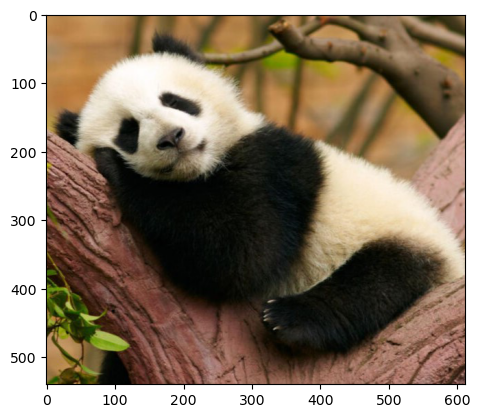

In [9]:
plt.imshow(image)